# Data Source:
https://data.lacity.org/City-Infrastructure-Service-Requests/Building-and-Safety-Inspections/9w5z-rg2h/about_data



Last update: yesterday
10.2M rows and 7 columns.


# Question 1: 

Make a table and a visualisation showing an interesting characteristic of the permit and inspection dataset



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
#import folium
#import plotly.express as px

In [2]:
# read dataset
inspected_permits_df = pd.read_csv('Building_and_Safety_Inspections_20250218.csv', low_memory=False)


In [3]:
# inspect data
inspected_permits_df.head(5)

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)"
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)"
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)"
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)"
4,2836 S ANCHOR AVE,15016 20001 17211,CofO Issued,07/18/2016,Inspection,Permit Finaled,"(34.03878, -118.39963)"


In [4]:
inspected_permits_df.tail(5)

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude
10237485,1603 W 219TH ST,21019 20000 01308,Issued,02/14/2025,Protection Fence/Barricades,Approved,"(33.82922, -118.30673)"
10237486,501 WORLD WAY,21016 10000 59041,Issued,02/12/2025,Final,No Access for Inspection,"(33.94297, -118.40516)"
10237487,4004 N ROGEN DR,22030 20000 06949,Issued,02/11/2025,Rough,Insp Cancelled,"(34.1444, -118.4964)"
10237488,18330 W JOVAN ST,24047 20000 00167,Issued,02/13/2025,ELECTRICAL-Final,Not Ready for Inspection,"(34.18307, -118.53276)"
10237489,2732-2734 S BUTLER AVE,24016 10000 19940,Issued,02/11/2025,Floor/Roof Diaphrgm/Shear Wall,Insp Cancelled,"(34.02721, -118.43568)"


In [5]:
# how much data do we have?
inspected_permits_df.shape

(10237490, 7)

In [6]:
# describe dataset
inspected_permits_df.describe()

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude
count,10237489,10237490,9756370,10032233,9756353,9756071,9756370
unique,631078,1701816,46,3999,184,63,435039
top,300 WORLD WAY,16014 10001 02498,Issued,05/11/2023,Final,Approved,"(33.94354, -118.4085)"
freq,14519,10150,7115019,16164,2331099,2117648,24607


A total of 631078 unique adresses with 1701816 permits within the coverage period.

In [7]:
# list the unique values of the permit status column

inspected_permits_df['Permit Status'].unique()

array(['Issued', 'Permit Finaled', 'CofO Issued', 'CofO in Progress',
       'Permit Expired', 'Permit Closed', 'CofO Corrected',
       'Application Submitted', 'Permit Withdrawn', nan,
       'Refund in Progress', 'No Progress', 'Insp Scheduled',
       'Refund Completed', 'Intent to Revoke', 'PC Info Complete',
       'TCO Renewed', 'TCO Issued', 'Partial Inspection',
       'Not Ready to Issue', 'CofO Reactivated', 'CofO Superseded',
       'Ready to Issue', 'Event Denied', 'CofO Revoked',
       'Application Withdrawn', 'PC Approved', 'Permit Extended',
       'Order to Comply Issued', 'Approved', 'OK to Expire Permit',
       'Not Ready for Inspection', 'Permit Revoked',
       'No Access for Inspection', 'Re-activate Application',
       'PC Fees Paid', 'CofC Issued', 'CofC Corrected', 'OK for CofC',
       'Re-Activate Permit', 'Partial Approval', 'OK to Issue CofC',
       'PC Unassigned', 'Corrections Issued', 'Not Required',
       'PC Fees Due', 'Approved Pending GreenAppro

In [8]:
# split the date column into day, month, and year columns
building_and_safety_df = inspected_permits_df.copy()

building_and_safety_df[['inspection_day', 'inspection_month', 'inspection_year']] = inspected_permits_df['Inspection Date'].str.split('/', expand=True)

In [9]:
building_and_safety_df.head()

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude,inspection_day,inspection_month,inspection_year
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)",07,20,2016
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)",07,22,2016
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)",07,18,2016
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)",07,20,2016
4,2836 S ANCHOR AVE,15016 20001 17211,CofO Issued,07/18/2016,Inspection,Permit Finaled,"(34.03878, -118.39963)",07,18,2016


In [10]:
# extract all the rows that have a permit status of 'Issued'

building_and_safety_df = building_and_safety_df[building_and_safety_df['Permit Status'] == 'Issued']
building_and_safety_df.head()

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude,inspection_day,inspection_month,inspection_year
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)",07,20,2016
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)",07,18,2016
7,4125 N PERLITA AVE #B,16016 20000 07926,Issued,07/18/2016,Drywall Nailing,Approved,"(34.12805, -118.26667)",07,18,2016
8,5744 W MANCHESTER AVE,01020 10000 02808,Issued,07/22/2016,Plumbing Verification,Insp Scheduled,"(33.95971, -118.38187)",07,22,2016
9,5924-5926 N FIGUEROA ST,16042 10000 11285,Issued,07/20/2016,Rough,Partial Approval,"(34.11074, -118.19008)",07,20,2016


In [11]:
# how many permits are issued
building_and_safety_df.shape


(7115019, 10)

# About 70% of the permits are issued within the coverage period.

In [12]:
# drop date columns and retain only the inspection year
issued_permits = building_and_safety_df.drop(['Inspection Date', 'inspection_day', 'inspection_month'], axis=1)
issued_permits.head()


,ADDRESS,PERMIT,Permit Status,Inspection Type,Inspection Result,Latitude/Longitude,inspection_year
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)",2016
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,Insulation,Approved,"(34.13745, -118.38853)",2016
7,4125 N PERLITA AVE #B,16016 20000 07926,Issued,Drywall Nailing,Approved,"(34.12805, -118.26667)",2016
8,5744 W MANCHESTER AVE,01020 10000 02808,Issued,Plumbing Verification,Insp Scheduled,"(33.95971, -118.38187)",2016
9,5924-5926 N FIGUEROA ST,16042 10000 11285,Issued,Rough,Partial Approval,"(34.11074, -118.19008)",2016


In [13]:
# what number of permits are issued per year?
yearly_permits = issued_permits.groupby(['inspection_year']).count()
yearly_permits


,ADDRESS,PERMIT,Permit Status,Inspection Type,Inspection Result,Latitude/Longitude
inspection_year,,,,,,
2013,185767,185767,185767,185767,185767,185767
2014,248139,248139,248139,248139,248138,248139
2015,581364,581364,581364,581364,581349,581364
2016,559478,559479,559479,559479,559473,559479
2017,420592,420592,420592,420592,420564,420592
2018,659189,659189,659189,659189,659157,659189
2019,770818,770818,770818,770818,770769,770818
2020,696601,696601,696601,696601,696566,696601
2021,682494,682494,682494,682494,682478,682494


In [14]:
# return count of permits issued per year

yearly_permit_count = yearly_permits['Permit Status']
yearly_permit_count

inspection_year
2013    185767
2014    248139
2015    581364
2016    559479
2017    420592
2018    659189
2019    770818
2020    696601
2021    682494
2022    726787
2023    765669
2024    733109
2025     85011
Name: Permit Status, dtype: int64

In [15]:
# visualise the number of permits issued per year using a table

yearly_permit_count.to_frame()

,Permit Status
inspection_year,
2013,185767
2014,248139
2015,581364
2016,559479
2017,420592
2018,659189
2019,770818
2020,696601
2021,682494


<Axes: xlabel='inspection_year'>

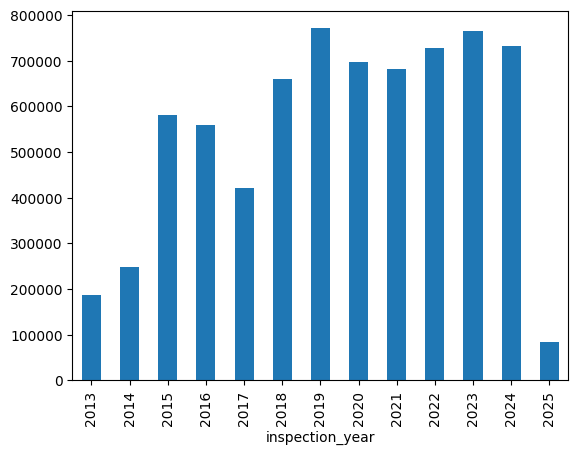

In [16]:
# visualise the number of permits issued per year

import matplotlib.pyplot as plt

yearly_permits['Permit Status'].plot(kind='bar')

# Interesting facts about the data:

Data covers 2013 to 2025 period.

70% of all permit applications were issued during the period under coverage.

2019 is the year with the highest number of issued permits.

More more than 50% of the issued permits were in the past 6 years.

# Question 2: 

Make a table and a visualisation showing the number of inpections by geography.

In a sentence or two, describe any patterns that you observe.

Make a table and a Visualisation showing the results of inspections across geographies. 
in a sentence or two, describe any patterns that you observe.

Were there any permits that did not get an inspection?

In [ ]:
geo_inspections_df = inspected_permits_df.copy()


In [ ]:
geo_inspections_df.head()

In [ ]:

# split latitude and longitude fields
geo_inspections_df[['latitude', 'longitude']] = geo_inspections_df['Latitude/Longitude'].str.split(',', expand=True)

# clean up lat and lon columns
# for lat col, remove leading (

geo_inspections_df['latitude'] = geo_inspections_df['latitude'].str.replace('(', '')


# for lon col, remove trailing )
geo_inspections_df['longitude'] = geo_inspections_df['longitude'].str.replace(')', '')



In [ ]:
# convert to numeric values
geo_inspections_df['latitude'] = pd.to_numeric(geo_inspections_df['latitude'], errors='coerce')
geo_inspections_df['longitude'] = pd.to_numeric(geo_inspections_df['longitude'], errors='coerce')

In [ ]:
# get minimum and maximum latitude and longitude

min_latitude = geo_inspections_df['latitude'].min()
max_latitude = geo_inspections_df['latitude'].max()

min_longitude = geo_inspections_df['longitude'].min()
max_longitude = geo_inspections_df['longitude'].max()

print(min_latitude, max_latitude, min_longitude, max_longitude)

In [ ]:
# create bins
num_bins = 11
# create an array of numbers that lie between min amd max latitude

lat_bins = np.linspace(min_latitude, max_latitude, num_bins).tolist()
print(f'lat_bins: {lat_bins}') #  lat_bins

lon_bins = np.linspace(min_longitude, max_longitude, num_bins).tolist()
print(f'lon_bins: {lon_bins}')


In [ ]:
# pair lat lon bins

lat_lon_bins = list(zip(lat_bins, lon_bins[1:]))

print(f'lat_lon_bins: {lat_lon_bins}')

len(lat_lon_bins)


In [ ]:
# calculate distance between points

def distance_between_points(x1, y1, x2, y2):
    dist = ((x1-x2)**2 + (y1-y2)**2)**0.5
    
    return dist, x1, y1 #x1, y1, x2, y2: ((x1-x2)**2 + (y1-y2)**2)**0.5


In [ ]:

#if the distance between the points is less than 0.05, then the points are the same bin   

lat_lon_df = geo_inspections_df[['latitude', 'longitude']]
lat_lon_df             


In [ ]:
max_distance = 0.05

In [ ]:

# Extract latitude and longitude only once
data_lat = geo_inspections_df['latitude'].values
data_lon = geo_inspections_df['longitude'].values

# Initialize distance column with NaN or some default value
geo_inspections_df['distance'] = np.nan  

# Vectorized computation
for bin_lat, bin_lon in lat_lon_bins:
    dist_val, x1, y1 = distance_between_points(bin_lat, bin_lon, data_lat, data_lon)
    
    if dist_val. < max_distance:
        geo_inspections_df.loc['latitude'], geo_inspections_df['longitude'] = x1, y1 


# add to df

# geo_inspections_df['distance'] = dist_val
# geo_inspections_df['binned_loc'] = x1, y1

# for each row if distance is less than max distance, then replace lat lon with bin value

# for dist in geo_inspections_df['distance']:
#     if dist < max_distance:
#         geo_inspections_df['binned_loc'] = bin_lat, bin_lon
# # if dist_val < max_distance:
# #     geo_inspections_df['binned_lloc'] = bin_lat, bin_lon
# #geo_inspections_df['distance'] = np.minimum(geo_inspections_df['distance'], dist_val)  # Keep min distance if needed


# if dist_val.any() < max_distance:
#         geo_inspections_df['binned_loc'] = bin_lat, bin_lon
#     geo_inspections_df['distance'] = dist_val
#     geo_inspections_df['binned_loc'] = bin_lat, bin_lon

In [ ]:
geo_inspections_df.head()

In [ ]:
for lat_lon_bin in lat_lon_bins:
    count = 0

    bin_lat, bin_lon = lat_lon_bin[0], lat_lon_bin[1]
    
    for index, row in lat_lon_df.iterrows():
        lat_lon_df = geo_inspections_df[['latitude', 'longitude']]
        data_lat, data_lon = lat_lon_df['latitude'], lat_lon_df['longitude']
    
        # calculate distance between points
        dist_val = distance_between_points(bin_lat, bin_lon, data_lat, data_lon)
        
        # add to distance column
        geo_inspections_df['distance'] = dist_val

        # if dist_val < max_distance:
        #     print(dist_val)
        #     # same bin
        #     count = count + 1
        #     # replace lat lon with bin value
        #     geo_inspections_df.loc[(geo_inspections_df['latitude'] == lat_lon_bin[0]) & (geo_inspections_df['longitude'] == lat_lon_bin[1])]
        # else:
        #     continue

    
    

In [ ]:
geo_inspections_df['distance']

In [ ]:
dist_val.to_frame()

In [ ]:
if dist_val < 0.05:
    count = count + 1
    # replace lat lon with bin value
    geo_inspections_df.loc[(geo_inspections_df['latitude'] == lat_lon_bin[0]) & (geo_inspections_df['longitude'] == lat_lon_bin[1])]


In [ ]:
  # calculate distance between points
    if distance_between_points(bin_lat, bin_lon, data_lat, data_lon) < 0.05:
        count = count + 1
        # replace lat lon with bin value
        geo_inspections_df.loc[(geo_inspections_df['latitude'] == lat_lon_bin[0]) & (geo_inspections_df['longitude'] == lat_lon_bin[1])]


In [ ]:
# if your lat/lon lies within a bin, replace with bin values

for lat_lon_bin in lat_lon_bins:
    geo_inspections_df.loc[(geo_inspections_df['latitude'] >= lat_lon_bin[0]) & (geo_inspections_df['latitude'] < lat_lon_bin[1]), ['latitude']] = lat_lon_bin[0]
    geo_inspections_df.loc[(geo_inspections_df['longitude'] >= lat_lon_bin[0]) & (geo_inspections_df['longitude'] < lat_lon_bin[1]), ['longitude']] = lat_lon_bin[0]




In [ ]:
geo_inspections_df['latitude'].unique()

In [ ]:
geo_inspections_df.head()

In [ ]:
# convert to numeric values
geo_inspections_df['latitude'] = pd.to_numeric(geo_inspections_df['latitude'], errors='coerce')
geo_inspections_df['longitude'] = pd.to_numeric(geo_inspections_df['longitude'], errors='coerce')

In [ ]:
# conver latlon to Points
from shapely.geometry import Point

geo_inspections_df['geometry'] = geo_inspections_df.apply(lambda row: Point((row['longitude'], row['latitude'])), axis=1)

geo_inspections_df.head()

In [ ]:
geo_df = gpd.GeoDataFrame(geo_inspections_df, geometry='geometry')
geo_df.head()

In [ ]:
fig = px.scatter_map(
    geo_df,
    lat = geo_inspections_df['latitude'],
    lon = geo_inspections_df['longitude'],
    zoom = 10,
    #hover_name = geo_inspections_df['Inspection Result'],
    hover_data = ['Permit Status'],
)
fig.show()

In [ ]:

# Filter out rows with invalid coordinates
viz_df = geo_inspections_df.dropna(subset=['latitude', 'longitude'])

In [ ]:
# unique values of inspection results
viz_df['Inspection Result'].unique()

In [ ]:
#map inspection results to colors

color_map = {
    'Partial Approval': 'green',
    'Insp Cancelled': 'red',
    'Approved': 'blue',
    'Permit Finaled': 'yellow',
    'Insp Scheduled': 'orange',
    'Not Ready for Inspection': 'gray',
    'OK for CofO': 'green',
    'Completed (special insp)': 'blue',
    'Partial Inspection': 'yellow',
    'Corrections Issued': 'red',
    'CofO in Progress': 'orange',
    'Cancelled': 'gray',
    'Conditional Approval': 'green',
    'CofO Issued': 'blue',
    'SGSOV Approved': 'yellow',
    'SGSOV Not Ready': 'red',
    'CofO on Hold': 'orange',
    'Not Applicable': 'gray',   
    'No Access for Inspection': 'green',   
    'Completed': 'blue',   
    'Permit Closed': 'yellow',   
    'SGSOV Not Required': 'red',    
    'OK to Expire Permit': 'orange',        
}

In [ ]:
# # use auto color map
# fig = px.scatter_map(
#     viz_df,
#     lat='latitude',
#     lon='longitude',
#     color='Inspection Result',
#     size='Permit Status',
#     #color_continuous_scale=px.colors.cyclical.IceFire,
#     size_max=15,
#     zoom=10,
#     #'ADDRESS',  # Address shown on hover
#     #hover_data=['PERMIT', 'Permit Status', 'Inspection Date', 'Inspection Type'],
#     color_discrete_map=color_map,  # Use our color mapping
#     #zoom=10,  # Adjust to fit the data area
#     #mapbox_style="open-street-map",
#     title="Inspection Results by Location"
# )

In [ ]:
#fig.show()

In [ ]:
# split latitude and longitude fields
geo_inspections_df[['latitude', 'longitude']] = geo_inspections_df['Latitude/Longitude'].str.split(',', expand=True)


In [ ]:
geo_inspections_df.head()

In [ ]:
# clean up lat and lon columns
# for lat col, remove leading (

geo_inspections_df['latitude'] = geo_inspections_df['latitude'].str.replace('(', '')


# for lon col, remove trailing )
geo_inspections_df['longitude'] = geo_inspections_df['longitude'].str.replace(')', '')


geo_inspections_df.head()

In [ ]:


def bin_lat_lon(df, num_bins=10):
    # Make a copy to avoid modifying the original dataframe
    df_copy = df.copy()
    
    # Convert lat/lon to numeric, errors='coerce' will convert invalid values to NaN
    df_copy['latitude'] = pd.to_numeric(df_copy['latitude'], errors='coerce')
    df_copy['longitude'] = pd.to_numeric(df_copy['longitude'], errors='coerce')
    
    # Drop rows with NaN values after conversion
    df_copy.dropna(subset=['latitude', 'longitude'], inplace=True)
    
    # Get min and max values to create bins
    lat_min, lat_max = df_copy['latitude'].min(), df_copy['latitude'].max()
    lon_min, lon_max = df_copy['longitude'].min(), df_copy['longitude'].max()
    
    # Create bin edges
    lat_edges = np.linspace(lat_min, lat_max, num_bins + 1)
    lon_edges = np.linspace(lon_min, lon_max, num_bins + 1)
    
    # Cut the data into bins and get the bin indices
    df_copy['lat_bin_idx'] = pd.cut(df_copy['latitude'], bins=lat_edges, labels=False)
    df_copy['lon_bin_idx'] = pd.cut(df_copy['longitude'], bins=lon_edges, labels=False)
    
    # Map bin indices back to the lower bound of each bin
    
    df_copy['lat_bin_idx'] = df_copy['lat_bin_idx'].map(lambda x: lat_edges[x])
    df_copy['lon_bin_idx'] = df_copy['lon_bin_idx'].map(lambda x: lon_edges[x])

    # df_copy['latitude_binned'] = lat_edges[df_copy['lat_bin_idx']]
    # df_copy['longitude_binned'] = lon_edges[df_copy['lon_bin_idx']]
    
    # Drop the temporary bin index columns
    # df_copy.drop(['lat_bin_idx', 'lon_bin_idx'], axis=1, inplace=True)
    
    return df_copy, lat_edges, lon_edges





In [ ]:

binned_df = bin_lat_lon(geo_inspections_df, num_bins=10)
binned_df.head()

In [ ]:
# convert lat lon to float
# geo_inspections_df['latitude'] = geo_inspections_df['latitude'].astype(float)
# geo_inspections_df['longitude'] = geo_inspections_df['longitude'].astype(float)


In [ ]:
# get only latitude and longitude columns

lat_lon_df = geo_inspections_df[['latitude', 'longitude']].astype(float)
lat_lon_df.dtypes

In [ ]:
lat_lon_df['latitude'][0]

In [ ]:
# get minimum and maximum latitude and longitude

min_latitude = lat_lon_df['latitude'].min()
max_latitude = lat_lon_df['latitude'].max()

min_longitude = lat_lon_df['longitude'].min()
max_longitude = lat_lon_df['longitude'].max()

print(min_latitude, max_latitude, min_longitude, max_longitude)

In [ ]:
# create bins
num_bins = 11
# create an array of numbers that lie between min amd max latitude

lat_bins = np.linspace(min_latitude, max_latitude, num_bins).tolist()
print(f'lat_bins: {lat_bins}') #  lat_bins

lon_bins = np.linspace(min_longitude, max_longitude, num_bins).tolist()
print(f'lon_bins: {lon_bins}')


In [ ]:
# pair lat lon bins

lat_lon_bins = list(zip(lat_bins, lon_bins[1:]))

print(f'lat_lon_bins: {lat_lon_bins}')

len(lat_lon_bins)


In [ ]:
def map_lat_lon(row, lat_lon_bins):
    # Iterate through all lat/lon bins
    for lat_bin, lon_bin in lat_lon_bins:
        # Check if this row's lat/lon falls within the current bin
        if (row['latitude'] >= lat_bin[0] and row['latitude'] < lat_bin[1] and
            row['longitude'] >= lon_bin[0] and row['longitude'] < lon_bin[1]):
            # Replace with bin values
            row['latitude'] = lat_bin[0]  # Use lower bound as representative
            row['longitude'] = lon_bin[0]  # Use lower bound as representative
            break  # Stop once we find a matching bin
    
    return row



In [ ]:
# To use with apply:
mapped_df = geo_inspections_df.apply(map_lat_lon, axis=1, args=(lat_lon_bins,))

In [ ]:
def map_lat_lon(df, lat_lon_bins):
    # for each lat lon bin
    count = 0
    for x in range(len(df)):
        # get data point
        data_point = df.iloc[x]

    for lat_lon_bin in lat_lon_bins:
        # if data point is within a bin
        if  data_point[0] >= lat_lon_bin[0] and  data_point[1] < lat_lon_bin[1]:
            if data_point['longitude'] >= lat_lon_bin[0] and  data_point['longitude'] < lat_lon_bin[1]:
                # replace lat lon with bin value
                df['latitude'] = lat_lon_bin[0]
                df['longitude'] = lat_lon_bin[1]

            else:
                count+=1
    return df

    

    

In [ ]:
geo_inspections_df.head()

In [ ]:
#drop latitude/longitude
#inspected_permits_df = inspected_permits_df.drop(['Latitude/Longitude'], axis=1)


In [ ]:
gpd_df = gpd.GeoDataFrame(inspected_permits_df, geometry=gpd.points_from_xy(inspected_permits_df.longitude, inspected_permits_df.latitude))

In [ ]:
gpd_df.head()

In [ ]:
# pair lat lon bins

lat_lon_bins = list(zip(lat_bins, lat_bins[1:]))
# lon_lat_bins = list(zip(lon_bins, lon_bins[1:]))

# convert to Points
lat_lon_bins = [shapely.geometry.Point(x) for x in lat_lon_bins]
# lon_lat_bins = [shapely.geometry.Point(x) for x in lon_lat_bins]

print(f'lat_lon_bins: {lat_lon_bins}')
# print(f'lon_lat_bins: {lon_lat_bins}')

In [ ]:
# assign data points to bins

inspected_permits_df['latitude_bin'] = pd.cut(inspected_permits_df['latitude'], lat_bins)
inspected_permits_df['longitude_bin'] = pd.cut(inspected_permits_df['longitude'], lon_bins)
inspected_permits_df.head()

In [ ]:
ax = sns.histplot(inspected_permits_df, x='latitude', bins=lat_bins)
ax.set(xlabel='Latitude', ylabel='Number of Inspections')

In [ ]:
ax = sns.histplot(inspected_permits_df, x='longitude', bins=lon_bins)
ax.set(xlabel='Longitude', ylabel='Number of Inspections')

In [ ]:
# convert lat/lon to geography



In [ ]:
# visualise the number of permits issued per geography using the bins

inspections_by_geography = inspected_permits_df.groupby(['latitude_bin', 'longitude_bin']).count()
inspections_by_geography

In [ ]:
# get the average number for each bin

#inspected_permits_df['latitude_bin'].unique()
inspected_permits_df['longitude_bin'][0]


In [ ]:
# count the number of inspections per bin

inspections_by_geography = inspected_permits_df.groupby(['latitude_bin', 'longitude_bin']).count()
inspections_by_geography

In [ ]:
inspections_by_geography = inspected_permits_df.groupby(['Latitude/Longitude']).count()
inspections_by_geography
# 435039 unique geographies

In [ ]:
# combine similar geographies


In [ ]:
# number of inspections by geography

# get distinct values of latitude and longitude

lat_lon = inspected_permits_df['Latitude/Longitude'].unique()
lat_lon



In [ ]:
inspected_permits_df = inspected_permits_df.drop(['Latitude/Longitude'], axis=1)

inspected_permits_df.head()

In [ ]:
# add back to original dataframe

inspected_permits_df['latitude'] = lat_lon['latitude']
inspected_permits_df['longitude'] = lat_lon['longitude']
inspected_permits_df.head(10)

In [ ]:
lat_lon['latitude'].unique()

In [ ]:
lat_lon['longitude'].unique()

In [ ]:
# bin latitude 
# create bins
import numpy as np


num_bins = 10
# create an array of numbers that lie between min amd max latitude

lat_bins = np.linspace(min_latitude, max_latitude, num_bins)
lat_bins



In [ ]:
lon_bins = np.linspace(min_longitude, max_longitude, num_bins)
lon_bins

In [ ]:
lat_lon_df = lat_lon
lat_lon_df['latitude'] = pd.cut(lat_lon_df['latitude'], lat_bins)
lat_lon_df

In [ ]:

ax = sns.histplot(lat_lon['latitude'], x='latitude', bins=lat_bins)
ax.set(xlabel='Latitude', ylabel='Number of Inspections')

In [ ]:
# for lat in lat_lon['latitude']:
#     if lat < min_latitude:
#         lat = min_latitude
#     elif lat > max_latitude:
#         lat = max_latitude

In [ ]:
# number of inspections by latitude and longitude


In [ ]:
longitude = issued_permits['Latitude/Longitude'].unique()
longitude


# Question 3: 

Your manager is convinced ‘out of town’ contractors are not as invested in the success
of their projects and so are the main culprits when it comes to violations. 

You are asked to complete an analysis to test this hypothesis.

Produce a model that quantifies the relationship between a contractor’s place of origin and their inspection outcome history. 

Investigate any other relevant factors as necessary.

Interpret your results and produce a clear response for your manager.